In [48]:
# To understand the syntactical methods used for pandas, following website was used as a reference : https://www.analyticsvidhya.com/blog/2021/05/analyze-covid-vaccination-progress-using-python/

# For ease of use, I changed the column name "First Dose Administered" to "First_Dose_Administered"

# Also changed column names for Age Groups, Genders and Vaccine Type
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

dt1 = pd.read_csv("C:/Users/Aadarsh Gupta/Downloads/cowin_vaccine_data_statewise.csv")
dt1.fillna(value = 0, inplace = True)
pd.set_option('display.max_rows', 100) 
dt1

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First_Dose_Administered,Second Dose Administered,Male,Female,Transgender,Total_Covaxin_Administered,Total_CoviShield _Administered,Total_SputnikV_Administered,AEFI,18-45_years,45-60_years,60+years,Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,0.0,0.0,0.0,0.0,0.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,0.0,0.0,0.0,0.0,0.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,0.0,0.0,0.0,0.0,0.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,0.0,0.0,0.0,0.0,0.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,0.0,0.0,0.0,0.0,0.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,14/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5694,15/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5695,16/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5696,17/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dt1.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First_Dose_Administered',
       'Second Dose Administered', 'Male', 'Female', 'Transgender',
       'Total_Covaxin_Administered', 'Total_CoviShield _Administered',
       'Total_SputnikV_Administered', 'AEFI', '18-45_years', '45-60_years',
       '60+years', 'Total Doses Administered'],
      dtype='object')

In [50]:
pd.unique(dt1['State'])

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [51]:
#state_wise_total_vaccinated = {}
#states = []
#for state in dt1.State.unique() :
#    states.append(state)
#for j in range(len(states)) : 
#    vaccinated = 0
 #   for i in range(len(dt1)) : 
  #      if dt1.State[i] == state : 
   #         vaccinated += dt1.First_Dose_Administered[i]
    #state_wise_total_vaccinated[state] = vaccinated 
    
#a_dict = {"State":states, "Total Vaccinations":state_wise_total_vaccinated}
 
#state_wise_total_vaccinated_dt2 = pd.DataFrame(a_dict)
#display(state_wise_total_vaccinated_dt2)

state_wise_total_vaccinated = []
for state in dt1.State.unique() :
    vaccinated = 0
    for i in range(len(dt1)) : 
        if dt1.State[i] == state : 
            vaccinated += dt1.First_Dose_Administered[i]
    state_wise_total_vaccinated.append([state, vaccinated])

state_wise_total_vaccinated_dt2 = pd.DataFrame(state_wise_total_vaccinated, columns = ['State','Total Vaccinations'])
state_wise_total_vaccinated_dtf = state_wise_total_vaccinated_dt2.drop([0])
display(state_wise_total_vaccinated_dtf)
            

,State,Total Vaccinations
1,Andaman and Nicobar Islands,6.740111e+06
2,Andhra Pradesh,4.475454e+08
3,Arunachal Pradesh,1.666188e+07
4,Assam,1.902991e+08
5,Bihar,5.317484e+08
6,Chandigarh,1.562322e+07
7,Chhattisgarh,3.758512e+08
8,Dadra and Nagar Haveli and Daman and Diu,7.709519e+06
9,Delhi,2.506169e+08
10,Goa,2.499129e+07


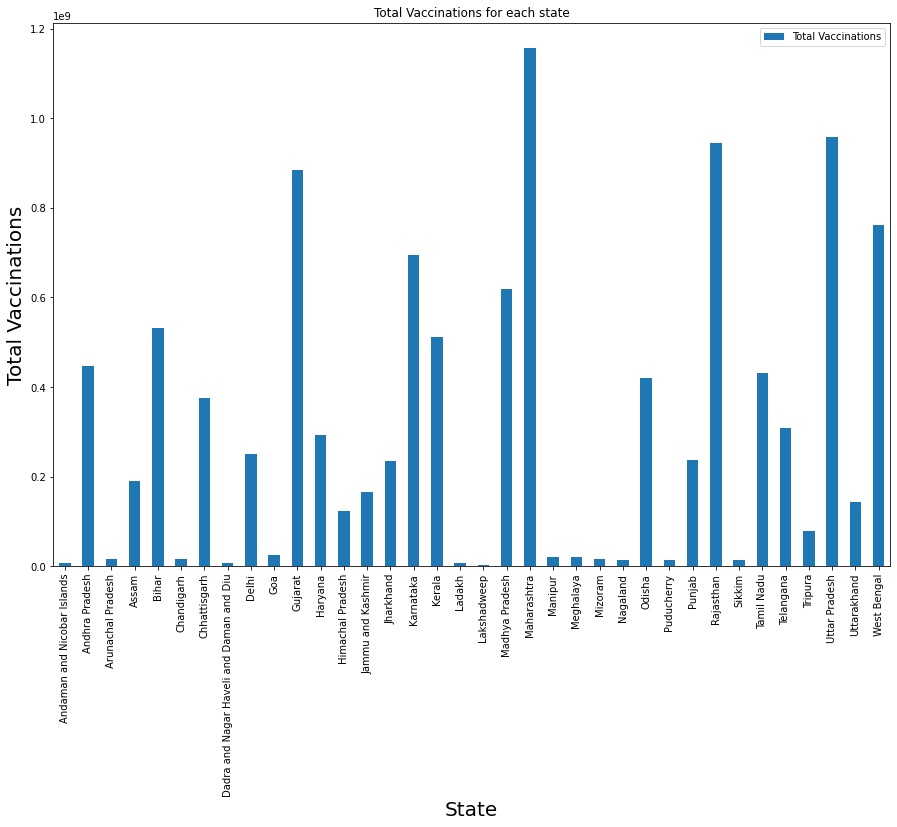

In [52]:
fig1 = state_wise_total_vaccinated_dtf.plot.bar(x="State", y="Total Vaccinations", title="Total Vaccinations for each state", figsize=(15,10))
plt.xlabel('State', fontsize=20)
plt.ylabel('Total Vaccinations', fontsize=20)
plt.savefig('Total Vaccinations.png', facecolor = 'orange')
plt.show(block=True)

In [53]:
male_total_vaccinated = dt1[["Updated On", "Male"]]
display(male_total_vaccinated)
female_total_vaccinated = dt1[["Updated On", "Female"]]
display(female_total_vaccinated)
transgender_total_vaccinated = dt1[["Updated On", "Transgender"]]
display(transgender_total_vaccinated)


,Updated On,Male
0,16/01/2021,23757.0
1,17/01/2021,27348.0
2,18/01/2021,41361.0
3,19/01/2021,81901.0
4,20/01/2021,98111.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


,Updated On,Female
0,16/01/2021,24517.0
1,17/01/2021,31252.0
2,18/01/2021,58083.0
3,19/01/2021,113613.0
4,20/01/2021,153145.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


,Updated On,Transgender
0,16/01/2021,2.0
1,17/01/2021,4.0
2,18/01/2021,5.0
3,19/01/2021,11.0
4,20/01/2021,24.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


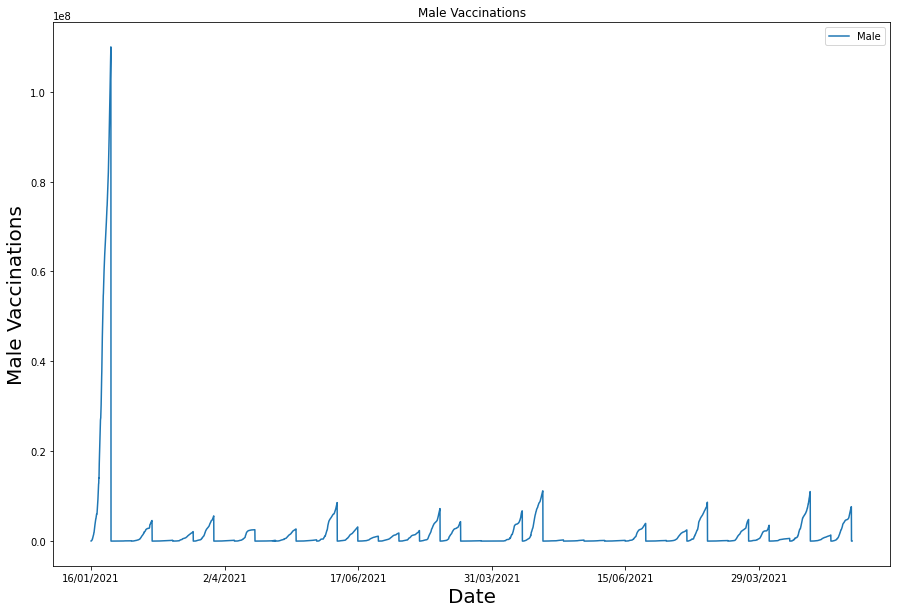

In [54]:
male_total_vaccinated.plot(x="Updated On", y="Male", title="Male Vaccinations", figsize=(15,10))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Male Vaccinations', fontsize=20)
plt.savefig('Male Vaccinations.png', facecolor = 'orange')
plt.show(block=True)

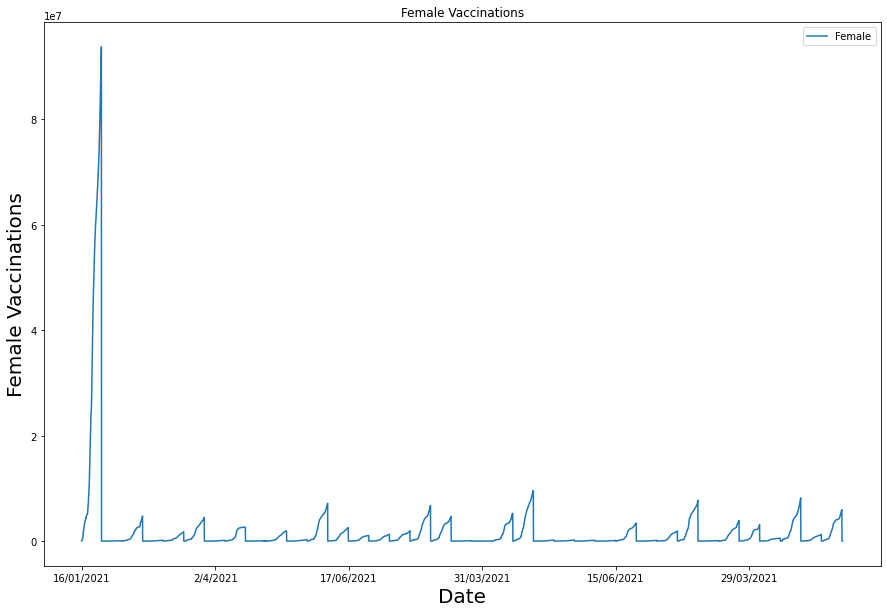

In [55]:
female_total_vaccinated.plot(x="Updated On", y="Female", title="Female Vaccinations", figsize=(15,10))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Female Vaccinations', fontsize=20)
plt.savefig('Female Vaccinations.png', facecolor = 'orange')
plt.show(block=True)

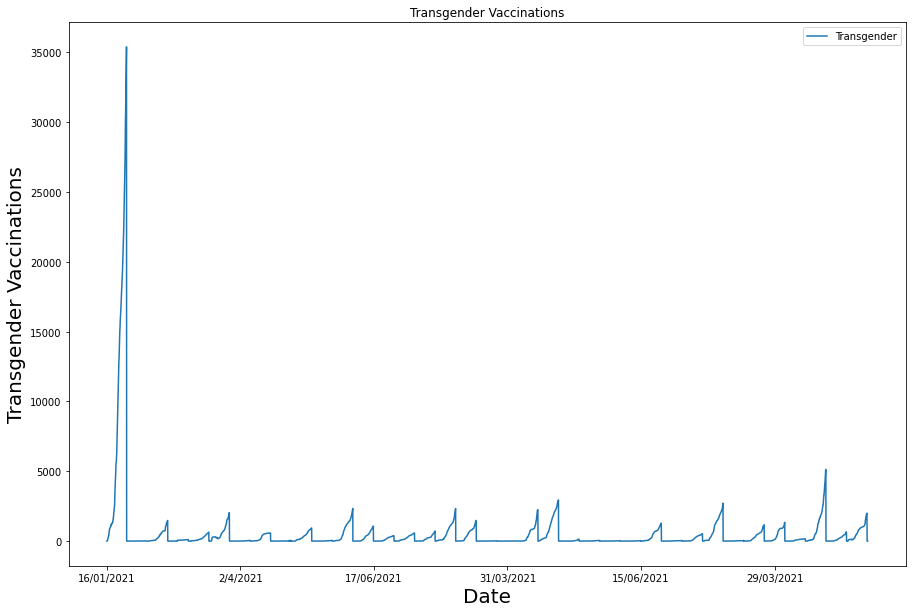

In [56]:
transgender_total_vaccinated.plot(x="Updated On", y="Transgender", title="Transgender Vaccinations", figsize=(15,10))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transgender Vaccinations', fontsize=20)
plt.savefig('Transgender Vaccinations.png', facecolor = 'orange')
plt.show(block=True)

In [57]:
types_of_vaccine1 = dt1[["Updated On", "Total_Covaxin_Administered"]]
display(types_of_vaccine1)
types_of_vaccine2 = dt1[["Updated On", "Total_CoviShield _Administered"]]
display(types_of_vaccine2)
types_of_vaccine3 = dt1[["Updated On", "Total_SputnikV_Administered"]]
display(types_of_vaccine3)
types_of_vaccine = dt1[["Updated On", "Total_Covaxin_Administered", "Total_CoviShield _Administered", "Total_SputnikV_Administered"]]
display(types_of_vaccine)
tf = types_of_vaccine.drop(columns = ['Updated On'])
total_each_type = tf.sum(axis = 0)
display(total_each_type)

,Updated On,Total_Covaxin_Administered
0,16/01/2021,579.0
1,17/01/2021,635.0
2,18/01/2021,1299.0
3,19/01/2021,3017.0
4,20/01/2021,3946.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


,Updated On,Total_CoviShield _Administered
0,16/01/2021,47697.0
1,17/01/2021,57969.0
2,18/01/2021,98150.0
3,19/01/2021,192508.0
4,20/01/2021,247334.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


,Updated On,Total_SputnikV_Administered
0,16/01/2021,0.0
1,17/01/2021,0.0
2,18/01/2021,0.0
3,19/01/2021,0.0
4,20/01/2021,0.0
...,...,...
5693,14/06/2021,0.0
5694,15/06/2021,0.0
5695,16/06/2021,0.0
5696,17/06/2021,0.0


,Updated On,Total_Covaxin_Administered,Total_CoviShield _Administered,Total_SputnikV_Administered
0,16/01/2021,579.0,47697.0,0.0
1,17/01/2021,635.0,57969.0,0.0
2,18/01/2021,1299.0,98150.0,0.0
3,19/01/2021,3017.0,192508.0,0.0
4,20/01/2021,3946.0,247334.0,0.0
...,...,...,...,...
5693,14/06/2021,0.0,0.0,0.0
5694,15/06/2021,0.0,0.0,0.0
5695,16/06/2021,0.0,0.0,0.0
5696,17/06/2021,0.0,0.0,0.0


Total_Covaxin_Administered        2.702193e+09
Total_CoviShield _Administered    2.396375e+10
Total_SputnikV_Administered       5.562980e+05
dtype: float64

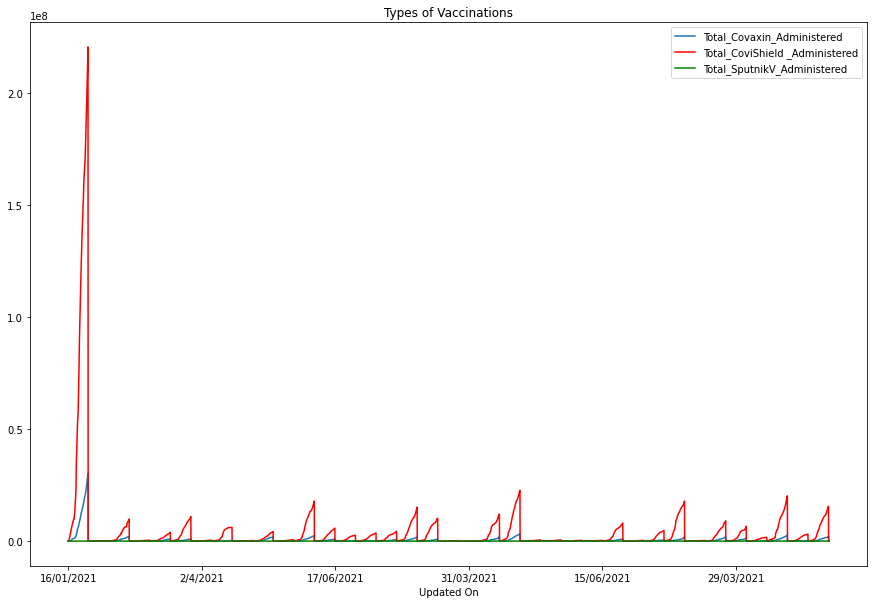

In [58]:
ax = plt.gca()

types_of_vaccine.plot(kind='line',x='Updated On',y='Total_Covaxin_Administered', title = "Types of Vaccinations", ax=ax, figsize=(15,10))
types_of_vaccine.plot(kind='line',x='Updated On',y='Total_CoviShield _Administered', color='red', ax=ax)
types_of_vaccine.plot(kind='line',x='Updated On',y='Total_SputnikV_Administered', color='green', ax=ax)
plt.savefig('Vaccinations type vs Time.png')
plt.show()

#plt.xlabel('Covaxin', fontsize=20)
#plt.plot(x="Updated On", y="Total_CoviShield _Administered", title="Types of Vaccines Used", figsize=(15,10))
#plt.ylabel('Transgender Vaccinations', fontsize=20)
#plt.savefig('Transgender Vaccinations.png', facecolor = 'orange')
#plt.show(block=True)

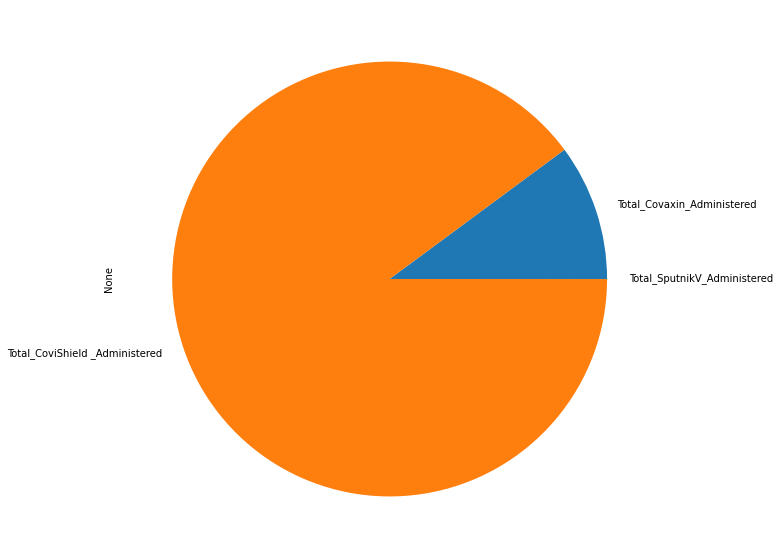

In [59]:
fig3 = total_each_type.plot.pie(subplots=True , figsize=(15, 10))
plt.savefig('Pie Distribution.png')